# Overview

Below is the logic used to clean and load each table into our MySQL Instance. See in the image below is the final schema.

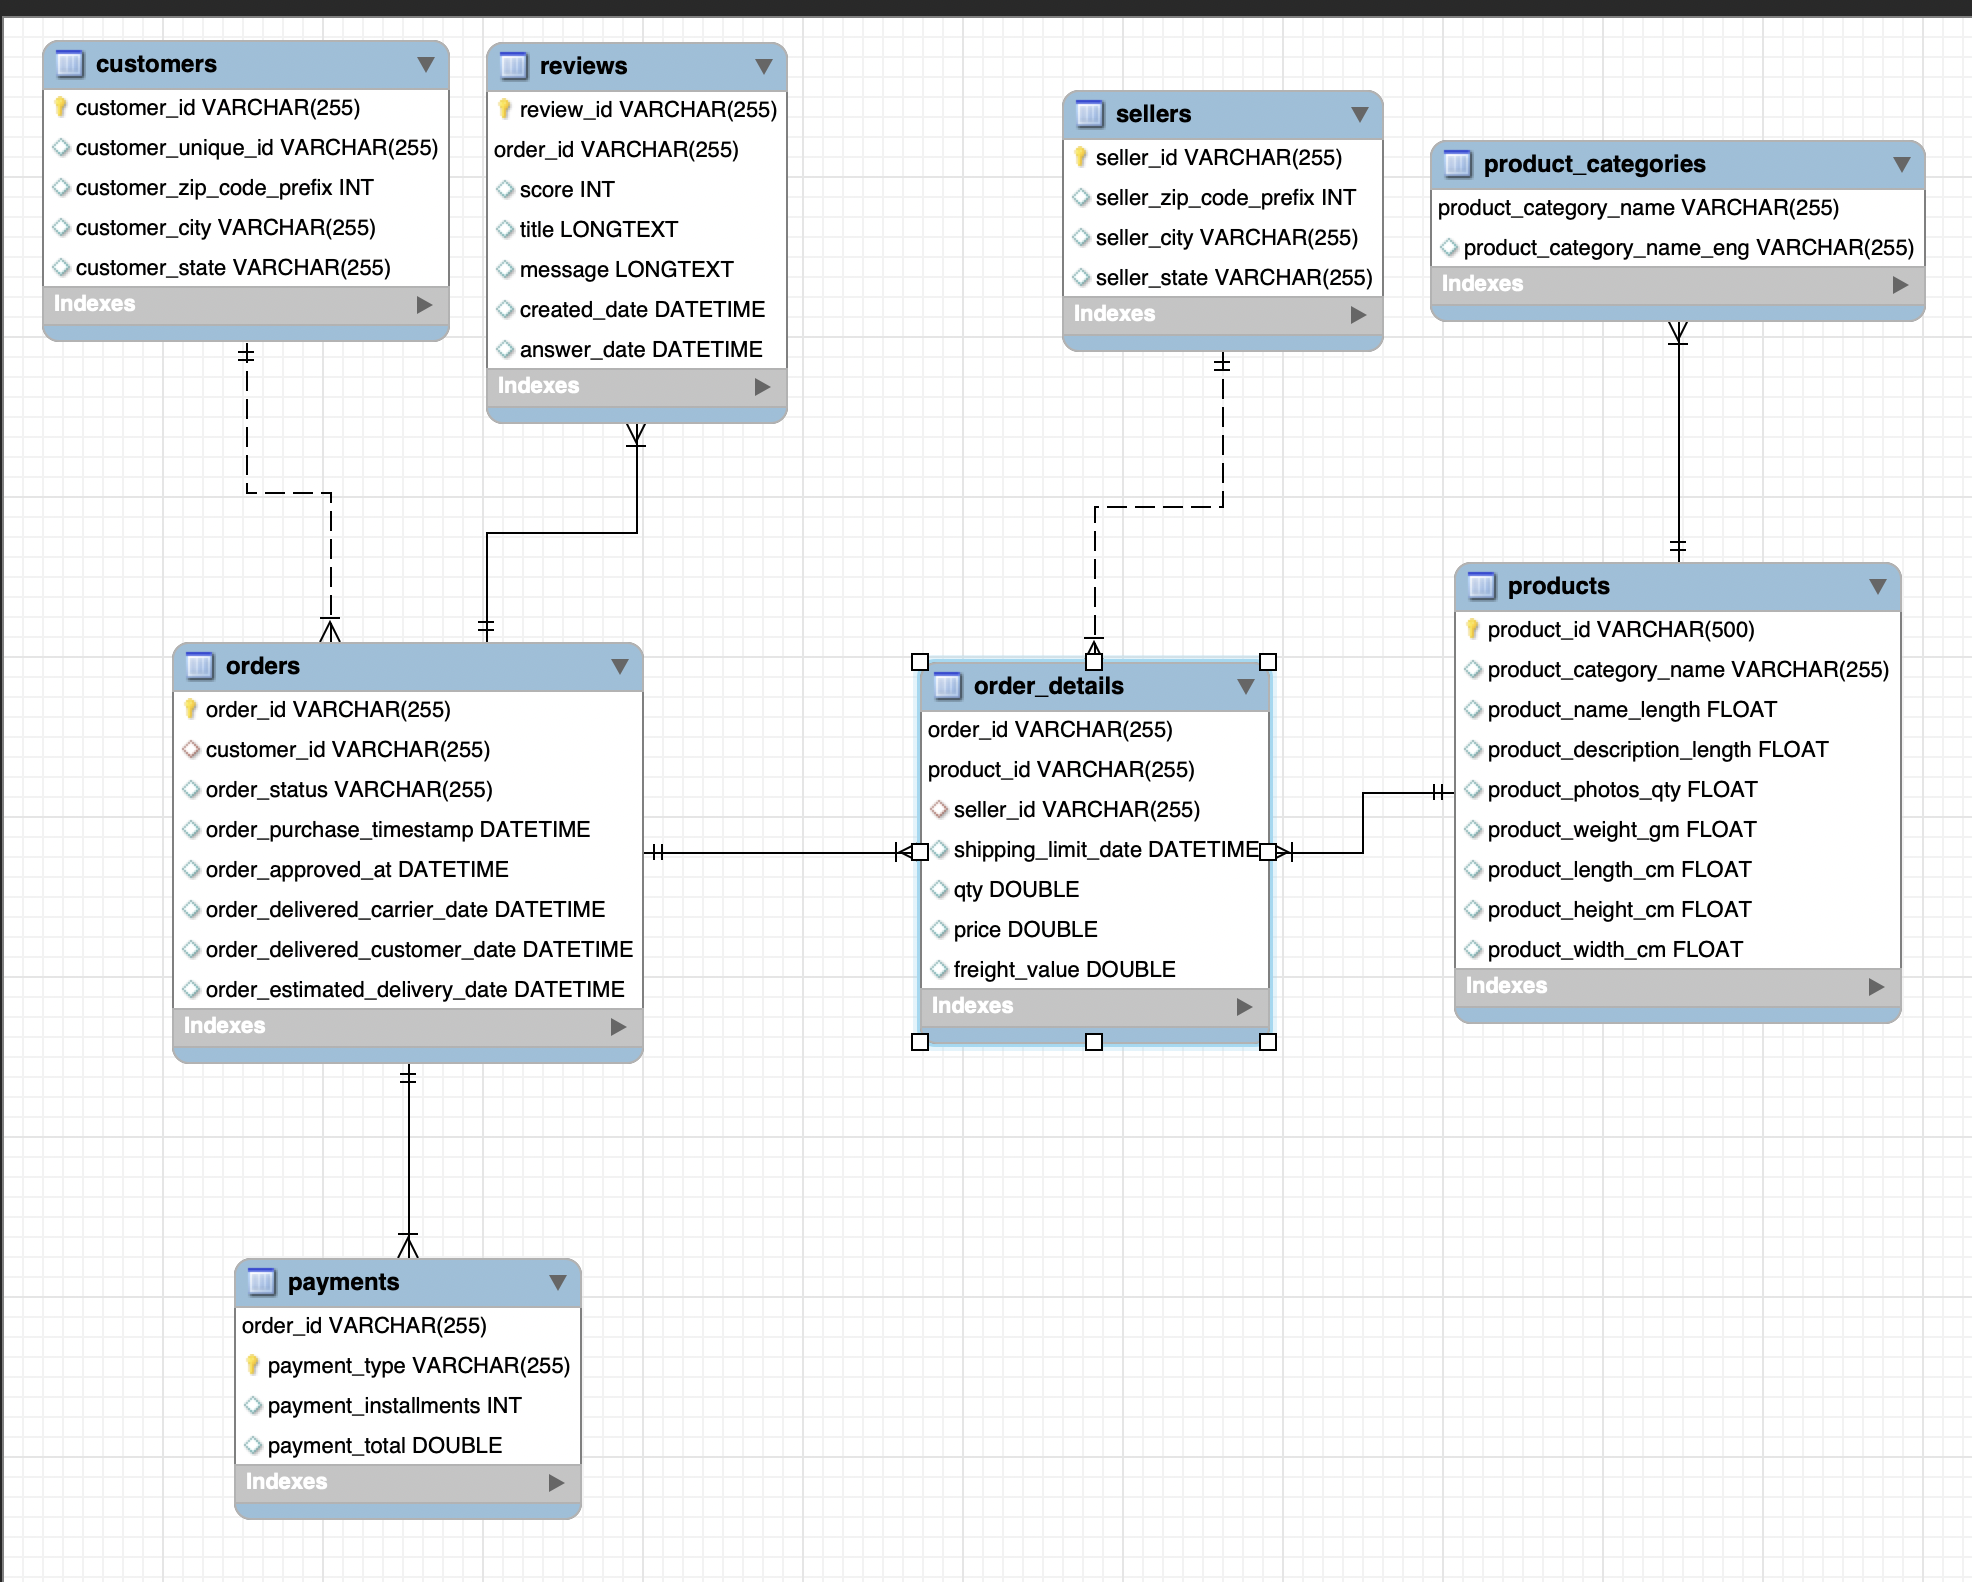


# AWS Log In

In [ ]:
%pip install pymysql

import matplotlib.pyplot as plt
import os
import pymysql
import pandas as pd
import numpy as np

succeess = False

while not succeess:
  password = input("Password: ")
  try:
    conn = pymysql.connect(
        host='db-aff.cpapv35x7rsh.us-east-2.rds.amazonaws.com',
        port=int(3306),
        user="admin",
        passwd=password,
        db='olist',
        charset='utf8mb4')
    db = conn.cursor()
    succeess = True
  except:
    print("Wrong Password")

print("Connection Made")

def add_quotes(s):
  try:
    s = s.replace('"', "")
    return '"'+str(s)+'",'
  except:
    return '"'+str(s)+'",'

def add_quotes_nocomma(s):
    try:
      s = s.replace('"', "")
      return '"'+str(s)+'"'
    except:
      return '"'+str(s)+'"'

# Loading Products

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/DS5110/olist/olist_products_dataset.csv')


query = """
INSERT INTO `olist`.`products` 
(`product_id`, `product_category_name`, `product_name_length`, 
 `product_description_length`, `product_photos_qty`, 
 `product_weight_gm`, `product_length_cm`, `product_height_cm`, 
 `product_width_cm`) VALUES (
"""

for index, row in df.iterrows():
    insert_query = query + add_quotes(row.product_id)+ add_quotes(row.product_category_name)+\
              add_quotes(row.product_name_lenght)+add_quotes(row.product_description_lenght)+\
              add_quotes(row.product_photos_qty)+add_quotes(row.product_weight_g)+\
              add_quotes(row.product_length_cm)+add_quotes(row.product_height_cm)+\
              add_quotes_nocomma(row.product_width_cm)+");"
    #db.execute(insert_query)
    #conn.commit()

# Loading Category Names

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/DS5110/olist/product_category_name_translation.csv')

"""INSERT INTO `olist`.`product_details` 
(`product_id`, `product_category_name`, `product_name_length`, 
 `product_description_length`, `product_photos_qty`, 
 `product_weight_gm`, `product_length_cm`, `product_height_cm`, 
 `product_width_cm`) 
VALUES ('a', 'asas', '10', '10', '1', '1', '1', '1', '1');"""

query = """
INSERT INTO `olist`.`product_categories` 
(`product_category_name`, `product_category_name_eng`) VALUES (
"""

for index, row in df.iterrows():
  insert_query = query + add_quotes(row.product_category_name) + add_quotes_nocomma(row.product_category_name_english)+");"
  #db.execute(insert_query)
  #conn.commit()

# Loading Customers

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/DS5110/olist/olist_customers_dataset.csv')

query = """
INSERT INTO `olist`.`customers` 
(`customer_id`, `customer_unique_id`, `customer_zip_code_prefix`,
`customer_city`, `customer_state`) VALUES (
"""

for index, row in df.iterrows():
  try:
    insert_query = query + add_quotes(row.customer_id) + add_quotes(row.customer_unique_id)+\
    add_quotes(row.customer_zip_code_prefix)+ add_quotes(row.customer_city) + add_quotes_nocomma(row.customer_state) +");"
    #db.execute(insert_query)
    #conn.commit()
  except:
    #print(insert_query)

# Loading Orders

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/DS5110/olist/olist_orders_dataset.csv')

query = """
INSERT INTO `olist`.`orders`
(`order_id`, `customer_id`, `order_status`,
`order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`) VALUES (
"""

for index, row in df.iterrows():
  try:
    insert_query = query + add_quotes(row.order_id) + add_quotes(row.customer_id) + add_quotes(row.order_status) +\
     add_quotes(row.order_purchase_timestamp)+add_quotes(row.order_approved_at)+add_quotes(row.order_delivered_carrier_date)+\
     add_quotes(row.order_delivered_customer_date)+add_quotes_nocomma(row.order_estimated_delivery_date)+");"
    #db.execute(insert_query)
    #conn.commit()
  except:
    print(index)

# Loading Sellers

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/DS5110/olist/olist_sellers_dataset.csv')

query = """
INSERT INTO `olist`.`sellers`
(`seller_id`, `seller_zip_code_prefix`, `seller_city`, `seller_state`) VALUES (
"""

for index, row in df.iterrows():
  try:
    insert_query = query + add_quotes(row.seller_id) + add_quotes(row.seller_zip_code_prefix) + add_quotes(row.seller_city) +\
     add_quotes_nocomma(row.seller_state)+");"
    # db.execute(insert_query)
    # conn.commit()
  except:
    print(index)

# Loading Reviews


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

all = pd.read_csv('gdrive/My Drive/DS5110/olist/olist_order_reviews_dataset.csv')

loaded = pd.read_sql_query("SELECT * FROM olist.reviews", conn)


df = all.merge(loaded, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']


query = """
INSERT INTO `olist`.`reviews`
(`review_id`, `order_id`, `score`, `title`, `message`, `created_date`, `answer_date`) VALUES (
"""

for index, row in df.iterrows():

  insert_query = query + add_quotes(row.review_id) + add_quotes(row.order_id) + add_quotes(row.review_score) +\
  add_quotes( row.review_comment_title ) + add_quotes(row.review_comment_message[:-3]) + add_quotes(row.review_creation_date) +\
  add_quotes_nocomma(row.review_answer_timestamp)+");"
  print(insert_query)
  # db.execute(insert_query)
  # conn.commit()

# Loading Payments

In [ ]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/DS5110/olist/olist_order_payments_dataset.csv')

df_counts = df.groupby(['order_id','payment_type']).size().reset_index(name='counts')

df = pd.read_csv('gdrive/My Drive/DS5110/olist/olist_order_payments_dataset.csv')

missing_count = 0

for index, row in df.iterrows():
  
  #Get Installments
  installments = pd.DataFrame(df_counts[ (df_counts['order_id'] == row.order_id) & (df_counts['payment_type'] == row.payment_type) ])
  installment_count = installments["counts"].iloc[0]

  #Get the payment rows for this order that respond to this payment type
  payment_rows = df.loc[ (df['order_id'] == row.order_id) & (df['payment_type'] == row.payment_type) ]

  #get the sum value for this order for this payment type 
  payment_row = payment_rows.groupby('order_id').apply(lambda g: g.assign(
          total=g.payment_value.sum()))
  

  payment_row = payment_row[['order_id', 'payment_type', 'total']].drop_duplicates()

  total = payment_row["total"].iloc[0]
  
  query = """
          INSERT INTO `olist`.`payments`
          (`order_id`, `payment_type`, `payment_installments`, `payment_total`) VALUES (

          """
  
  try:


    insert_query = query + add_quotes(row.order_id) + add_quotes(row.payment_type) + add_quotes(installment_count) +\
      add_quotes_nocomma(total)+");"
    # db.execute(insert_query)
    # conn.commit()
  
  except:

    print(index)
    print(insert_query)
    print(row)
    missing_count +=1
    print(missing_count)
  

# Loading Order Details

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/DS5110/olist/olist_order_items_dataset.csv')

df_counts = df.groupby(['order_id','product_id']).size().reset_index(name='counts')

missing_count = 0


for index, row in df.iterrows():

  item_order_rows = df.loc[ (df['order_id'] == row.order_id) & (df['product_id'] == row.product_id) ]
  
  qty = item_order_rows.order_item_id.count()


  query = """

          INSERT INTO `olist`.`order_details`
          (`order_id`, `product_id`, `seller_id`, `shipping_limit_date`, `qty`, `price`, `freight_value`) VALUES (

          """

  try:
    insert_query = query + add_quotes(row.order_id) + add_quotes(row.product_id) + add_quotes(row.seller_id) + add_quotes(row.shipping_limit_date) +\
        add_quotes(qty) + add_quotes(row.price) + add_quotes_nocomma(row.freight_value)+");"
    # db.execute(insert_query)
    # conn.commit()
  except:
      print("------------------------------------------------------------------")
      print(index)
      print(row)
      missing_count +=1
      print("------------------------------------------------------------------")
      
print(missing_count)
